In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
inspector=inspect(engine)  # another way to get data from a db
inspector.get_table_names()

['measurement', 'station']

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine,reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Msrmt = Base.classes.measurement

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [11]:
first_row = session.query(Station).first()
first_row.__dict__ 

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2552e9444e0>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [12]:
first_row = session.query(Msrmt).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2552e944978>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

# Exploratory Precipitation Analysis

In [47]:
# Find the most recent date in the data set.
recent_date =session.query(Msrmt.date).order_by(Msrmt.date.desc()).limit(1)

recent_date[0][0]
#print(type(recent_date))  TODO figure out how to convert this to

'2017-08-23'

In [79]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
yearago=dt.date(2017,8,23)-dt.timedelta(days=365)
print(yearago)
# Perform a query to retrieve the data and precipitation scores
last12mosrain_df =pd.DataFrame(session.query(Msrmt.date,Msrmt.prcp).filter(Msrmt.date >= yearago).order_by(Msrmt.date).all())

last12mosrain_df['date'] = pd.to_datetime(last12mosrain_df['date'])
#type(last12mosrain_df['date'][0])#.dt.strftime('%b-%Y')
last12mosrain_df['date'][0].strftime('%b-%Y')
# Save the query results as a Pandas DataFrame and set the index to the date column
last12mosrain_df

2016-08-23


,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


In [ ]:
#last12mosrain_df.sort_values(by='date')
last12mosrain_df.set_index('date', inplace=True)

In [90]:
# Sort the dataframe by date
#
#last12mosrain_df.index#describe()
#pd.DatetimeIndex(last12mosrain_df.index).year
#df['Mon_Year'] = df['Date'].dt.strftime('%b-%Y')
type(last12mosrain_df.index)#.dt.strftime('%b-%Y')
fuck = list(last12mosrain_df.index)
for date in fuck:
    print(date.dt.strftime('%b-%Y'))

AttributeError: 'Timestamp' object has no attribute 'dt'

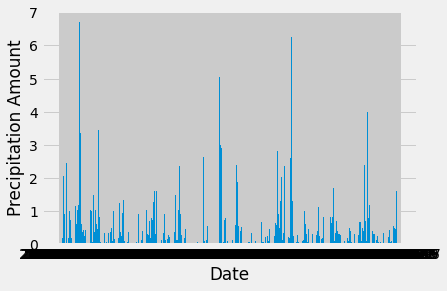

In [58]:
# Use Pandas Plotting with Matplotlib to plot the 
#plot = datalast12mosrain_df.plot(kind='bar')
plot = plt.bar(x=last12mosrain_df.index, height=last12mosrain_df.prcp)
plt.xlabel('Date')
plt.ylabel('Precipitation Amount')
#plt.xticks( make range that's just month/year)
plt.show()

In [37]:
last12mos_df =pd.DataFrame(session.execute('select longitude,name,elevation,latitude, m.station from measurement m,'))
last12mos_df.head()

,0,1,2,3,4
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [ ]:
# Use Pandas to calcualte the summary statistics for the precipitation data


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number stations in the dataset


In [ ]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()